In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import random, randint
from statistics import mode, StatisticsError
from PIL import Image
from io import BytesIO

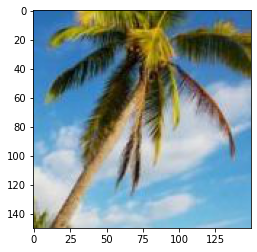

In [2]:
image = Image.open('test.jpg') # Open Image
plt.imshow(image)

In [3]:
pix = image.load()     # Check dimensions and pixel values
print(image.size) 
print(pix[image.size[0] - 1, image.size[1] - 1])
pix[image.size[0] - 1, image.size[1] - 1][0]

(150, 150)
(117, 185, 220)


117

# Grayscale the Given Picture

In [ ]:
def turnGray(image, width, height):  # turn the image into gray scale
  pix = image.load()
  hheight = int(height/2)
  rgbMatrix = np.ones(((width*hheight), 3))
  count = 0
  grayImage = np.empty([height, width], dtype=np.uint8)
  for x in range(height):
    for y in range(width):
      if (x < hheight):
        rgbMatrix[count][0] = pix[y, x][0]  # keeps track of the rgb values for left side of pic
        rgbMatrix[count][1] = pix[y, x][1]
        rgbMatrix[count][2] = pix[y, x][2]
        count = count + 1
      gray = 0.21*(pix[y, x][0]) + 0.72*(pix[y, x][1]) + 0.07*(pix[y, x][2]) # gray formula
      # print(x, y)
      grayImage[x, y] = gray  #returns 2D matrix for gray values
  return grayImage, rgbMatrix

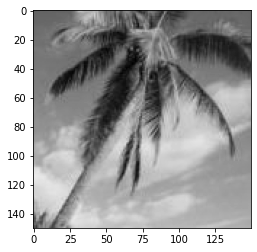

array([[ 99,  98,  98, ..., 102, 102, 101],
       [100,  99,  99, ..., 102, 101, 101],
       [ 99,  99,  99, ..., 103, 102, 101],
       ...,
       [106, 107,  92, ..., 170, 170, 169],
       [ 83,  89,  69, ..., 172, 172, 172],
       [ 76,  77,  62, ..., 174, 173, 173]], dtype=uint8)

In [ ]:
gray, rgb = turnGray(image, image.size[0], image.size[1])
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()
gray

# K Means Clustering of 5 to Find Representative Colors

In [ ]:
def k5Means(rgb, iterations):   # takes in list of rgb values and number of times centroid is to be recalculated
  centroids = np.ones((5, 3))
  for index in range(5):
    x = randint(0, rgb.shape[0]-1)
    centroids[index] = rgb[x]
  for times in range(iterations):
    # print(centroids)
    closestToC0 = []    # keeps track of closest centroids
    closestToC1 = []
    closestToC2 = []
    closestToC3 = []
    closestToC4 = []
    for pixel in range(rgb.shape[0]):
      distancetoC = []
      for c in range(5):
        d = np.linalg.norm(rgb[pixel] - centroids[c])   #calculates distance between vectors
        distancetoC.append(d)
      # print(distancetoC)
      minD = min(distancetoC)
      mIndex = distancetoC.index(minD)
      if (mIndex == 0):
        closestToC0.append(rgb[pixel])  # adds to list closest to corresponding centroid
      elif (mIndex == 1):
        closestToC1.append(rgb[pixel])
      elif (mIndex == 2):
        closestToC2.append(rgb[pixel])
      elif (mIndex == 3):
        closestToC3.append(rgb[pixel])
      elif (mIndex == 4):
        closestToC4.append(rgb[pixel])

    centroids[0] = sum(closestToC0) / len(closestToC0) # updates the values of centroids
    centroids[1] = sum(closestToC1) / len(closestToC1)
    centroids[2] = sum(closestToC2) / len(closestToC2)
    centroids[3] = sum(closestToC3) / len(closestToC3)
    centroids[4] = sum(closestToC4) / len(closestToC4)

    for cent in centroids:
      for x in range(len(centroids)):
        temp = int(cent[x])
        cent[x] = temp

  return(centroids)



In [ ]:
centroids = k5Means(rgb, 10)
print(centroids)

[[ 48.  49.  26.]
 [ 78. 108. 130.]
 [ 64. 130. 192.]
 [175. 182. 187.]
 [141. 125.  45.]]


# Change Training Data to 5 Best Representative Colors

In [ ]:
def changeTraining(centroids, image): # changes the left side of image to the best 5 representative colors
  pix = image.load()
  for x in range(int(image.size[0]/2)):
    for y in range(image.size[1]):
      distancetoC = []
      current = [0, 0, 0]
      current[0] = pix[x, y][0]
      current[1] = pix[x, y][1]
      current[2] = pix[x, y][2]

      for c in range(len(centroids)):
        d = np.linalg.norm(current - centroids[c])  # calculates the distance
        distancetoC.append(d)
      minD = min(distancetoC) # min distance to centroid is taken and color is changed to color of centroid
      mIndex = distancetoC.index(minD)
      pix[x, y] = (int(centroids[mIndex][0]), int(centroids[mIndex][1]), int(centroids[mIndex][2]), 255)
  return image

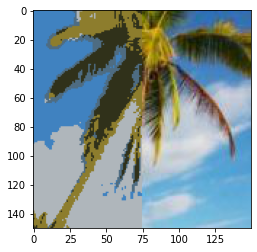

In [ ]:
newpic = changeTraining(centroids, image)
plt.imshow(newpic)

# Basic Agent - KNN Model to Predict

In [ ]:
def basicAgent(gray, image): # basic agent that uses knn to classify into 5 best representative colors
  pix = image.load()
  trainPatch = []
  for a in range(1, image.size[1]-1):   # gets all patches from training img as 1x9 vector
    for b in range(1, int(image.size[0]/2)-1):
      trainPatch.append([(gray[a-1][b-1], gray[a][b-1], gray[a+1][b-1],
          gray[a-1][b], gray[a][b], gray[a+1][b],
          gray[a-1][b+1], gray[a][b+1], gray[a+1][b+1]), [a, b]])
  # print(len(trainPatch))
          
  for x in range(int(image.size[0]/2)+1, image.size[0]-1):    # gets every patch from test data
    for y in range(1, image.size[1]-1):
      # print(x, y)
      current = (gray[y-1][x-1], gray[y-1][x], gray[y-1][x+1],
             gray[y][x-1], gray[y][x], gray[y][x+1],
             gray[y+1][x-1], gray[y+1][x], gray[y+1][x+1])

      closestPatches = np.ones((6, 3))*10000
      min = 10000
      minIndex = 0

      for tr in range(len(trainPatch)):
        d = math.sqrt(sum([(a - b) ** 2 for a, b in zip(current, trainPatch[tr][0])]))
          # print(d)                    # calculates distance from test data to each training data
        max = 0
        ind = 0
        for nearest in range(6):      # only keeps track of 6 closest ones
          if (max < closestPatches[nearest][0]):
            max = closestPatches[nearest][0]
            ind = nearest
        if (d < max):
          closestPatches[ind][0] = d
          closestPatches[ind][1] = trainPatch[tr][1][0]
          closestPatches[ind][2] = trainPatch[tr][1][1]
          if (d < min):
            min = d
            minIndex = ind

      colors = []
      for co in range(6):
        m = closestPatches[co][1]   # gets middle value color of closest patches
        n = closestPatches[co][2]
        colors.append(pix[n, m])  
      try:
        chosen = mode(colors)     # if mode change to mode
      except StatisticsError:
        chosen = colors[minIndex]    # if no mode change to color of closest patch
      pix[x, y] = chosen

    if (x % 2 == 0):
      print("~~~~~~~~~~~~~~~~~~ done with " + str(x))
  return image

10804


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ubyte_scalars


~~~~~~~~~~~~~~~~~~ done with 76
~~~~~~~~~~~~~~~~~~ done with 78
~~~~~~~~~~~~~~~~~~ done with 80
~~~~~~~~~~~~~~~~~~ done with 82
~~~~~~~~~~~~~~~~~~ done with 84
~~~~~~~~~~~~~~~~~~ done with 86
~~~~~~~~~~~~~~~~~~ done with 88
~~~~~~~~~~~~~~~~~~ done with 90
~~~~~~~~~~~~~~~~~~ done with 92
~~~~~~~~~~~~~~~~~~ done with 94
~~~~~~~~~~~~~~~~~~ done with 96
~~~~~~~~~~~~~~~~~~ done with 98
~~~~~~~~~~~~~~~~~~ done with 100
~~~~~~~~~~~~~~~~~~ done with 102
~~~~~~~~~~~~~~~~~~ done with 104
~~~~~~~~~~~~~~~~~~ done with 106
~~~~~~~~~~~~~~~~~~ done with 108
~~~~~~~~~~~~~~~~~~ done with 110
~~~~~~~~~~~~~~~~~~ done with 112
~~~~~~~~~~~~~~~~~~ done with 114
~~~~~~~~~~~~~~~~~~ done with 116
~~~~~~~~~~~~~~~~~~ done with 118
~~~~~~~~~~~~~~~~~~ done with 120
~~~~~~~~~~~~~~~~~~ done with 122
~~~~~~~~~~~~~~~~~~ done with 124
~~~~~~~~~~~~~~~~~~ done with 126
~~~~~~~~~~~~~~~~~~ done with 128
~~~~~~~~~~~~~~~~~~ done with 130
~~~~~~~~~~~~~~~~~~ done with 132
~~~~~~~~~~~~~~~~~~ done with 134
~~~~~~~~~~~~~~~~~~ don

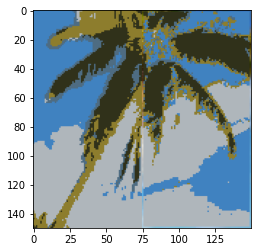

In [ ]:
newBasic = basicAgent(gray, image)
plt.imshow(newBasic)

In [ ]:
def colorBlack(image):    # adds black border around the test data image for values not calculated
  pix = image.load()
  x = image.size[0]
  y = image.size[1]
  mid = int(x/2)
  for a in range(mid):
    pix[mid+a, 0] = (0, 0, 0, 255)
    pix[mid+a, y-1] = (0, 0, 0, 255)
  for b in range(y):
    pix[mid, b] = (0, 0, 0, 255)
    pix[x-1, b] = (0, 0, 0, 255)

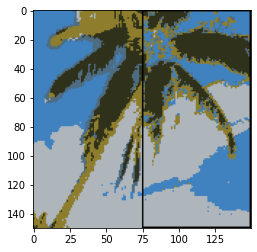

In [ ]:
colorBlack(image)
plt.imshow(image)

# Calculate Error and MSE for R, G, B

In [ ]:
def calculateError(original, changed): # calculates the Error separately for R, G, B
  og = original.load()
  ch = changed.load()
  x = original.size[0]
  y = original.size[1]
  mid = int(x/2)
  errorR = 0
  errorB = 0
  errorG = 0
  for a in range(1, x - 1): 
    for b in range(mid, y-1):
      errorR = errorR + math.pow(og[b, a][0] - ch[b, a][0], 2)
      errorB = errorB + math.pow(og[b, a][1] - ch[b, a][1], 2)
      errorG = errorG + math.pow(og[b, a][2] - ch[b, a][2], 2)
  return errorR, errorB, errorG


In [ ]:
imageog = Image.open('test.jpeg')
eR, eB, eG = calculateError(imageog, image)
print(eR, eB, eG)

19331295.0 10857343.0 30575035.0


In [7]:
n = (image.size[0]/2-2)*(image.size[1]-2)

In [2]:
# Calculates MSE
print("MSE - R: " + str(eR/n) + ", G: " + str(eG/n) + ", B: " + str(eB/n))

MSE - R: 1789.2720288781932, G: 2829.973620881155, B: 1004.9373380229545


# Finding Best Representative of Number of Colors for Data

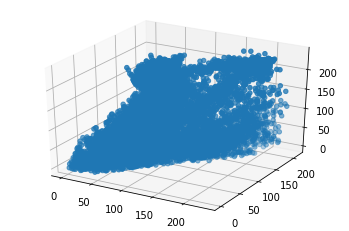

In [ ]:
fig = plt.figure()      # plotted 3D plot for each (r, g, b) vector
ax = plt.axes(projection='3d')
red = []
green = []
blue = []
for a in range(len(rgb)):
  red.append(rgb[a][0])
  green.append(rgb[a][1])
  blue.append(rgb[a][2])

ax.scatter3D(red, green, blue);

In [ ]:
def k8Means(rgb, iterations):   # k means clustering with k of 8
  centroids = np.ones((8, 3))
  for index in range(8):
    x = randint(0, rgb.shape[0]-1)
    centroids[index] = rgb[x]
  for times in range(iterations):
    # print(centroids)
    closestToC0 = []
    closestToC1 = []
    closestToC2 = []
    closestToC3 = []
    closestToC4 = []
    closestToC5 = []
    closestToC6 = []
    closestToC7 = []
    for pixel in range(rgb.shape[0]):
      distancetoC = []
      for c in range(8):
        d = np.linalg.norm(rgb[pixel] - centroids[c])
        distancetoC.append(d)
      # print(distancetoC)
      minD = min(distancetoC)
      mIndex = distancetoC.index(minD)
      if (mIndex == 0):
        closestToC0.append(rgb[pixel])
      elif (mIndex == 1):
        closestToC1.append(rgb[pixel])
      elif (mIndex == 2):
        closestToC2.append(rgb[pixel])
      elif (mIndex == 3):
        closestToC3.append(rgb[pixel])
      elif (mIndex == 4):
        closestToC4.append(rgb[pixel])
      elif (mIndex == 5):
        closestToC5.append(rgb[pixel])
      elif (mIndex == 6):
        closestToC6.append(rgb[pixel])
      elif (mIndex == 7):
        closestToC7.append(rgb[pixel])

    centroids[0] = sum(closestToC0) / len(closestToC0)
    centroids[1] = sum(closestToC1) / len(closestToC1)
    centroids[2] = sum(closestToC2) / len(closestToC2)
    centroids[3] = sum(closestToC3) / len(closestToC3)
    centroids[4] = sum(closestToC4) / len(closestToC4)
    centroids[5] = sum(closestToC5) / len(closestToC5)
    centroids[6] = sum(closestToC6) / len(closestToC6)
    centroids[7] = sum(closestToC7) / len(closestToC7)

    for cent in centroids:
      for x in range(3):
        temp = int(cent[x])
        cent[x] = temp

  return(centroids)

[[ 69. 137. 197.]
 [ 37.  37.  14.]
 [176. 185. 195.]
 [ 53.  68.  66.]
 [100.  87.  27.]
 [ 60. 116. 171.]
 [164. 145.  46.]
 [ 99. 113. 115.]]


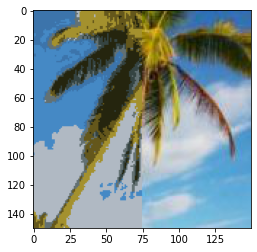

In [ ]:
image3 = Image.open('test.jpeg')  # centroids and clustering result of 8 means cluster
gray3, rgb3 = turnGray(image3, image3.size[0], image3.size[1])
centroids3 = k8Means(rgb3, 10)
print(centroids3)
newpic3 = changeTraining(centroids3, image3)
plt.imshow(newpic3)

In [ ]:
def k10Means(rgb, iterations): # k means clustering with k of 10
  centroids = np.ones((10, 3))
  for index in range(10):
    x = randint(0, rgb.shape[0]-1)
    centroids[index] = rgb[x]
  for times in range(iterations):
    # print(centroids)
    closestToC0 = []
    closestToC1 = []
    closestToC2 = []
    closestToC3 = []
    closestToC4 = []
    closestToC5 = []
    closestToC6 = []
    closestToC7 = []
    closestToC8 = []
    closestToC9 = []
    for pixel in range(rgb.shape[0]):
      distancetoC = []
      for c in range(10):
        d = np.linalg.norm(rgb[pixel] - centroids[c])
        distancetoC.append(d)
      # print(distancetoC)
      minD = min(distancetoC)
      mIndex = distancetoC.index(minD)
      if (mIndex == 0):
        closestToC0.append(rgb[pixel])
      elif (mIndex == 1):
        closestToC1.append(rgb[pixel])
      elif (mIndex == 2):
        closestToC2.append(rgb[pixel])
      elif (mIndex == 3):
        closestToC3.append(rgb[pixel])
      elif (mIndex == 4):
        closestToC4.append(rgb[pixel])
      elif (mIndex == 5):
        closestToC5.append(rgb[pixel])
      elif (mIndex == 6):
        closestToC6.append(rgb[pixel])
      elif (mIndex == 7):
        closestToC7.append(rgb[pixel])
      elif (mIndex == 8):
        closestToC8.append(rgb[pixel])
      elif (mIndex == 9):
        closestToC9.append(rgb[pixel])

    centroids[0] = sum(closestToC0) / len(closestToC0)
    centroids[1] = sum(closestToC1) / len(closestToC1)
    centroids[2] = sum(closestToC2) / len(closestToC2)
    centroids[3] = sum(closestToC3) / len(closestToC3)
    centroids[4] = sum(closestToC4) / len(closestToC4)
    centroids[5] = sum(closestToC5) / len(closestToC5)
    centroids[6] = sum(closestToC6) / len(closestToC6)
    centroids[7] = sum(closestToC7) / len(closestToC7)
    centroids[8] = sum(closestToC8) / len(closestToC8)
    centroids[9] = sum(closestToC9) / len(closestToC9)

    for cent in centroids:
      for x in range(3):
        temp = int(cent[x])
        cent[x] = temp

  return(centroids)



[[ 74.  92.  96.]
 [ 82. 118. 148.]
 [ 52. 116. 180.]
 [ 32.  34.  13.]
 [ 69. 138. 197.]
 [116. 102.  30.]
 [152. 144. 119.]
 [ 60.  61.  36.]
 [171. 151.  42.]
 [177. 189. 204.]]


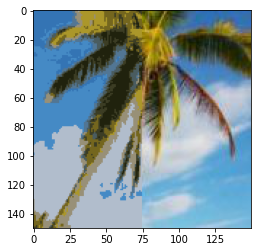

In [ ]:
image4 = Image.open('test.jpeg')  # centroids and clustering result of 8 means cluster
gray4, rgb4 = turnGray(image4, image4.size[0], image4.size[1])
centroids4 = k10Means(rgb4, 10)
print(centroids4)
newpic4 = changeTraining(centroids4, image4)
plt.imshow(newpic4)